In [ ]:
# ΑΝΑΓΝΩΡΙΣΗ ΠΡΟΤΥΠΩΝ - ΕΡΓΑΣΙΑ 1

### ΕΥΘΥΜΙΟΣ ΓΡΗΓΟΡΑΚΗΣ - ΑΕΜ: 9694
### ΑΝΕΣΤΗΣ ΚΑΪΜΑΚΑΜΙΔΗΣ - ΑΕΜ: 9627

In [1]:
!pip install numpy 
!pip install matplotlib
!pip install scipy

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy import integrate, optimize

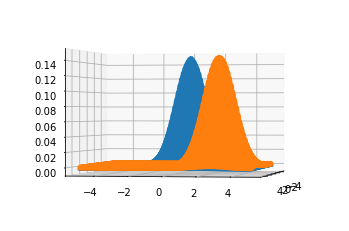

In [66]:
mean1 = np.array([0.4,0.8])
mean2 = np.array([1.5,2.7])

Sigma = np.array([[1.5, 0],
                  [0, 0.8]])

P1 = 0.95
P2 = 0.05

points = 100

x1 = np.linspace(-5,5,num = points)
x2 = np.linspace(-5,5,num = points)
        
x12v = np.linspace([-3,-4],[3,4],num = points)

xx,yy = np.meshgrid(x1,x2)

x12 = np.array((xx.ravel(), yy.ravel())).T

x1plot = x12[:,0]
x2plot = x12[:,1]


p1 = np.zeros(points * points)
p2 = np.zeros(points * points)
    
for i in range(points * points):
    p1[i] = np.exp(-np.matmul(np.matmul(np.transpose(x12[i] - mean1),np.linalg.inv(Sigma)),(x12[i] - mean1))/2) / (2 * np.pi * np.sqrt(np.linalg.det(Sigma)))
    p2[i] = np.exp(-np.matmul(np.matmul(np.transpose(x12[i] - mean2),np.linalg.inv(Sigma)),(x12[i] - mean2))/2) / (2 * np.pi * np.sqrt(np.linalg.det(Sigma)))


fig = plt.figure()

axes = plt.axes(projection ='3d')
axes.scatter(x1plot, x2plot, p1, marker = '^')
axes.scatter(x1plot, x2plot, p2, marker = 'o')
axes.view_init(0,10)

plt.show() 

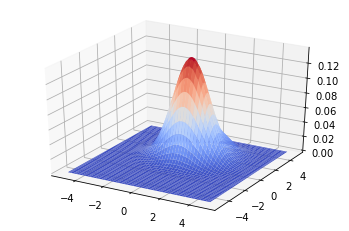

In [59]:
px = np.zeros(points * points)

for i in range(points * points):
    px[i] = p1[i] * P1 + p2[i] * p2[i]
    
fig = plt.figure()

px = np.reshape(px,(points,points))
axes = plt.axes(projection = '3d')
axes.plot_surface(xx,yy,px,cmap=cm.coolwarm)
# axes.view_init(25, 45)

plt.show()

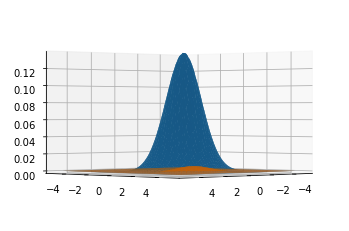

In [68]:

P1x = np.zeros(points * points)
P2x = np.zeros(points * points)

for i in range(points * points):
    P1x[i] = -np.matmul(np.matmul(np.transpose(x12[i] - mean1),np.linalg.inv(Sigma)),(x12[i] - mean1))/2 - np.log(2*np.pi) - np.log(np.linalg.det(Sigma))/2 + np.log(P1)
    P2x[i] = -np.matmul(np.matmul(np.transpose(x12[i] - mean2),np.linalg.inv(Sigma)),(x12[i] - mean2))/2 - np.log(2*np.pi) - np.log(np.linalg.det(Sigma))/2 + np.log(P2)
    
fig = plt.figure()

P1x = np.reshape(P1x,(points,points))
P2x = np.reshape(P2x,(points,points))

axes = plt.axes(projection = '3d')
axes.plot_surface(xx,yy,np.exp(P1x))
axes.plot_surface(xx,yy,np.exp(P2x))
axes.view_init(0, 45)
plt.show()

In [72]:
error1 = 0
error2 = 0
p1 = p1.reshape((points, points))
p2 = p2.reshape((points, points))
px = px.reshape((points, points))
size = x1[1] - x1[0]
counter = 0
for i in range(points):
    for j in range(points):
        counter += p2[i,j] * size**2 * P2
        counter += p1[i,j] * size**2 * P1
        if(P1x[i,j] > P2x[i,j]):
            error2 += p2[i,j] * size**2 * P2
        elif(P2x[i,j] > P1x[i,j]):
            error1 += p1[i,j] * size**2 * P1

print(counter)
print(error1, error2)
print(error1+error2)

0.9996189449669785
0.007201191385157958 0.027407549105377925
0.03460874049053588


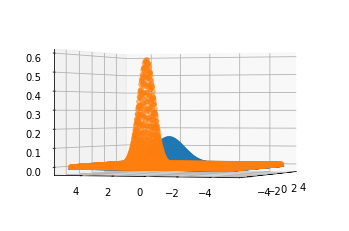

In [92]:

Sigma1 = Sigma
Sigma2 = Sigma/4

points = 100

p1 = np.zeros(points*points)
p2 = np.zeros(points*points)
    
for i in range(points*points):
    p1[i] = np.exp(-np.matmul(np.matmul(np.transpose(x12[i] - mean1),np.linalg.inv(Sigma1)),(x12[i] - mean1))/2) / (2 * np.pi * np.sqrt(np.linalg.det(Sigma1)))
    p2[i] = np.exp(-np.matmul(np.matmul(np.transpose(x12[i] - mean2),np.linalg.inv(Sigma2)),(x12[i] - mean2))/2) / (2 * np.pi * np.sqrt(np.linalg.det(Sigma2)))

fig = plt.figure()

axes = plt.axes(projection ='3d')
axes.scatter(x1plot, x2plot, p1, marker = '^')
axes.scatter(x1plot, x2plot, p2, marker = 'o')
axes.view_init(0, 200)

plt.show() 

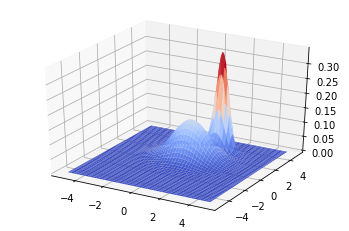

In [93]:
px = np.zeros(points * points)

for i in range(points * points):
    px[i] = p1[i] * P1 + p2[i] * p2[i]
    
fig = plt.figure()

px = np.reshape(px,(points,points))
axes = plt.axes(projection = '3d')
axes.plot_surface(xx,yy,px,cmap=cm.coolwarm)

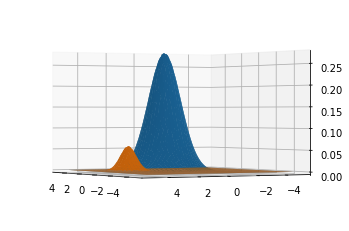

In [94]:
P1x = np.zeros(points*points)
P2x = np.zeros(points*points)

for i in range(points*points):
    P1x[i] = -np.matmul(np.matmul(np.transpose(x12[i] - mean1),np.linalg.inv(Sigma1)),(x12[i] - mean1))/2 - np.log(np.pi) - np.log(np.linalg.det(Sigma1))/2 + np.log(P1)
    P2x[i] = -np.matmul(np.matmul(np.transpose(x12[i] - mean2),np.linalg.inv(Sigma2)),(x12[i] - mean2))/2 - np.log(np.pi) - np.log(np.linalg.det(Sigma2))/2 + np.log(P2)
    
fig = plt.figure()

P1x = P1x.reshape((points, points))
P2x = P2x.reshape((points, points))

axes = plt.axes(projection = '3d')
axes.plot_surface(xx,yy,np.exp(P1x))
axes.plot_surface(xx,yy,np.exp(P2x))
axes.view_init(0,150)
plt.show()

In [95]:
error1 = 0
error2 = 0
p1 = p1.reshape((points, points))
p2 = p2.reshape((points, points))
px = px.reshape((points, points))
size = x1[1] - x1[0]
for i in range(points):
    for j in range(points):
        if(P1x[i,j] > P2x[i,j]):
            error2 += p2[i,j] * size**2 * P2 
        elif(P2x[i,j] > P1x[i,j]):
            error1 += p1[i,j] * size**2 * P1


print(error1, error2)
print(error1+error2)

0.013297606197415017 0.015718367683429484
0.029015973880844502
